In [ ]:
""" Kora S. Hughes - Computer Vision: Project 2 - Facial Recognition"""
# graded on implementation, approx 20%<accuracy<100% --> PCA

In [57]:
import numpy as np
import sys
import os
from PIL import Image
from matplotlib import pyplot as plt

np.set_printoptions(threshold=1000, edgeitems=4)

train_data = "/Face-dataset/Training/"
test_data = "/Face-dataset/Testing/"
here = os.getcwd()

In [59]:
# training
def eigen(faces):
    """ returns an array of eigenface vectors """
    ri = np.array([face.flatten() for face in faces])  # flattened faces (1d)
    assert ri.shape[0] == len(faces)  # precaution to make sure shapes are right
    assert ri.shape[1] == faces[0].shape[0]*faces[0].shape[1]
    
    mean_f = mean_faces(ri)  # avg face
#     print("found mean faces, meu...", mean_f.shape)

    a = np.array([np.subtract(temp_face, mean_f) for temp_face in ri])  # face deviation from the mean
#     print("found a, ri vector...", a.shape)
            
#     c = np.dot(a, a.T)  # 45045 x 45045
    l = np.dot(a, a.T)  # 8x8
#     print("l shape:", l.shape)
    l_val, v = np.linalg.eig(l)  # eigenvalues and eigenvectors
#     print("eigen vec, v...:", v.shape)
    u = np.dot(a.T, v).T  # len(faces) largest eigenfaces of c
#     print("found u eigenfaces...", u.shape)  # should be 8 x 45045
    
    omega = np.array([np.dot(u, r) for r in a])  # face-space version
    return omega, u, mean_f


def mean_faces(faces):
    """ returns the mean of matricies """
    # Note: assuming all faces are the same size (a x b  or (a*b) x 1)
    mean_face = np.zeros(faces[0].shape)
    if len(faces[0].shape) == 2:  # mean of normal 2d image
        for i in range(faces[0].shape[0]):
            for j in range(faces[0].shape[1]):
                mean_face[i,j] = sum([face[i,j]/len(faces) for face in faces])
    elif len(faces[0].shape) == 1:  # mean of flattened image
        for i in range(faces[0].shape[0]):
            mean_face[i] = sum([face[i]/len(faces) for face in faces])  # np.sum(faces[:,i])/len(faces)?
    else:
        assert 0 < len(faces[0].shape) < 3
    return mean_face


def poof(flat_im, num_cols):
    """ poof up a flattened 2d image so we can see what it looks like """
    num_rows = int(len(flat_im)/num_cols)
    poof_im = np.zeros((num_rows, num_cols))
    for i in range(num_rows):
        for j in range(num_cols):
            flatify = j + i*num_cols
            poof_im[i,j] = flat_im[flatify]
    return poof_im

In [60]:
# testing
def nn1(input_image, omega, u, meu):
    """ 1-nearest neighbor classifier 
        --> checks test image with eigenfaces and returns the closes match's index """
    I = input_image.flatten() - meu
    omega_I = np.dot(u, I)
    print("Omega_I EigenCoefficient:\n", omega_I)
    
#     Ir = np.dot(U, omega_I)
#     print("Ir shape:", Ir)
#     d0 = dist(Ir, I)
#     if d0 > t0:
#         return -1
    
    d = np.empty((len(omega)))
    for i in range(len(omega)):
        # compute euclidean distance between face and eigen-coefficients
        d[i] = dist(omega_I, omega[i])
    print("Recognition Distances:\n", d)
    return np.argmin(d)
        
    
def dist(im, coef):
    """ returns euclidean distance of im to a coefficient"""
#     print("Getting dist of", im, "&", coef)
    assert len(im) == len(coef)
    return np.sum(np.abs(im - coef))  # euclidean distance -- np.sum(np.abs(im - coef))

starting...


images imported...
Looking at 8 images size (231, 195)
Mean Face:
 [255.    255.    255.    255.    ... 238.375 235.    232.625 231.625]


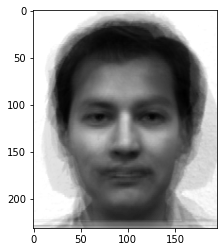



EigenFaces:
 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00 ...
  -9.55799715e+01 -1.21271292e+02 -1.24693635e+02 -1.15655232e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00 ...
  -3.56884333e+01 -4.63882020e+01 -4.31669894e+01 -3.18780171e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00 ...
  -1.40998324e-14 -1.95399252e-14 -1.52100554e-14  3.44169138e-15]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00 ...
   1.71239832e+01  2.03807106e+01  2.05316123e+01  2.03900816e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00 ...
   2.96050618e+00  3.80391906e+00  5.73981124e+00  7.25070140e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00 ...
   1.39800127e+01  1.89917990e+01  1.90989696e+01  1.84354634e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00 ...
   1.17877923e+01  1.06021426e+01  2.14609409e+01  3.76143876e+01]
 [ 0.00000000e+00  0.00000

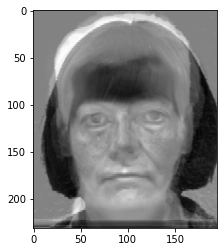

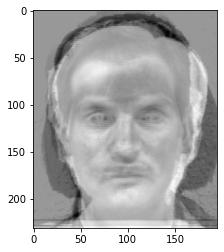

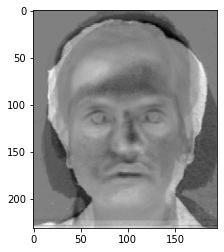

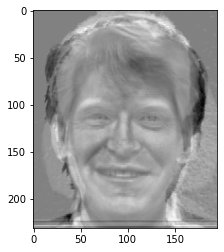

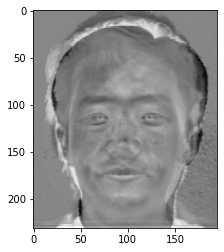

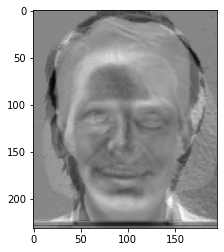

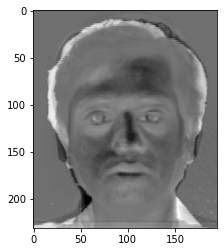

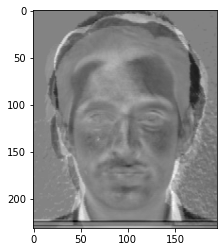

EigenFace Coefficients:
 [[ 4.02141286e+06 -7.52452236e+07 -6.94099298e-08 -9.71677281e+06
  -4.13968681e+06 -4.36315496e+06 -6.82757689e+07  3.57311192e+06]
 [-1.50042915e+08  8.48214886e+07  2.94610289e-08 -3.00322966e+07
   2.81282439e+06 -3.26165136e+07 -5.24622139e+06 -4.08083047e+07]
 [-7.91941041e+07  1.62586757e+07  1.82944083e-09  4.01456153e+07
  -3.23404267e+06 -6.28173919e+07  1.24791544e+07  4.06735524e+07]
 [-1.60187559e+07  3.33116597e+07  7.14889843e-09  9.00913744e+07
  -1.72266362e+07  5.05906408e+07  1.31487345e+06 -1.16657524e+07]
 [ 2.85928788e+07 -8.10156436e+07 -2.69613034e-08  3.37476424e+07
   3.45062678e+07  1.96219877e+06  1.84007464e+07 -1.40831858e+07]
 [ 2.97846453e+08  7.05477790e+07  4.31363743e-08 -1.85004946e+07
  -6.91361191e+05 -1.39750180e+07  1.13339880e+06 -6.17719521e+05]
 [-3.08733154e+06 -9.92361069e+07 -1.53361493e-08 -5.03852274e+07
  -2.35573871e+07  1.17404601e+06  3.71206584e+07 -8.01780000e+06]
 [-8.21176376e+07  5.05573710e+07  3.0131639

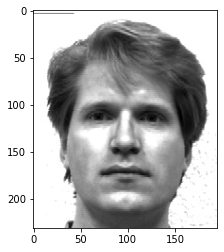

...with...
Omega_I EigenCoefficient:
 [ 1.55489186e+07  1.67588571e+07 -1.90309016e-09  8.98923136e+07
 -4.21280388e+06  2.86103955e+07 -1.77733252e+06 -1.31108982e+07]
Recognition Distances:
 [3.19369787e+08 4.52997908e+08 3.05437389e+08 8.78509672e+07
 2.53480767e+08 5.05990030e+08 3.65680777e+08 3.72792335e+08]


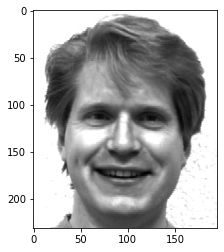





 matching image:


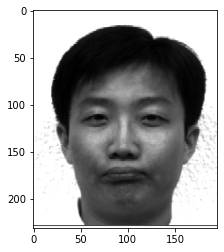

...with...
Omega_I EigenCoefficient:
 [ 1.12736682e+07 -7.52281309e+07 -2.28120573e-08  2.28207746e+07
  2.39736971e+07  2.69436715e+06  2.02580871e+07 -3.97713477e+06]
Recognition Distances:
 [1.71061904e+08 4.93026506e+08 3.44428538e+08 3.18831253e+08
 5.72617220e+07 5.37488510e+08 1.81529619e+08 4.19250085e+08]


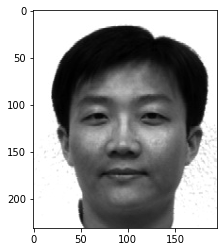





 matching image:


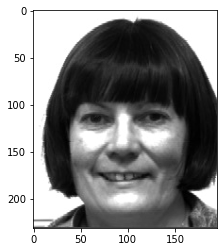

...with...
Omega_I EigenCoefficient:
 [ 2.82258502e+08  8.06768810e+07  4.81929883e-08 -1.53418745e+07
  4.32562701e+06 -4.13344001e+06  3.11279058e+06  3.31236602e+05]
Recognition Distances:
 [5.23109759e+08 5.30630877e+08 5.97310603e+08 5.41146979e+08
 5.30426323e+08 4.66625864e+07 5.75849579e+08 5.36541137e+08]


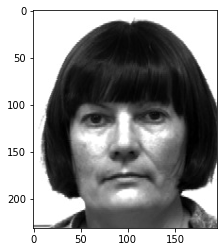





 matching image:


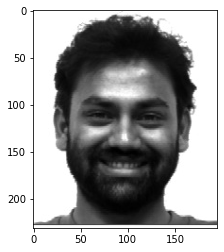

...with...
Omega_I EigenCoefficient:
 [-9.39416811e+07 -2.09305169e+07  7.11638193e-10 -3.31479938e+07
 -1.18606888e+07 -6.44310789e+06  1.69635470e+07 -3.48835699e+06]
Recognition Distances:
 [2.77810761e+08 2.65345572e+08 2.38877611e+08 3.41630235e+08
 3.16319614e+08 5.35315952e+08 2.30397580e+08 2.43717633e+08]


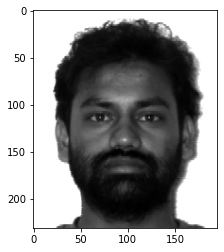





 matching image:


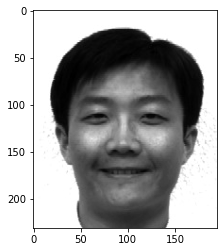

...with...
Omega_I EigenCoefficient:
 [ 1.13354498e+07 -6.57575582e+07 -1.78879305e-08  4.00260981e+07
  1.45319843e+07  5.29920536e+06  2.49565291e+07 -1.12780581e+07]
Recognition Distances:
 [2.02962073e+08 4.91383682e+08 3.22976914e+08 2.77568106e+08
 7.14661707e+07 5.50323971e+08 1.95951574e+08 4.26999432e+08]


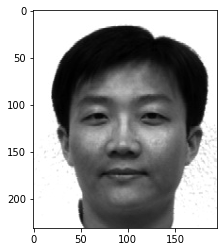





 matching image:


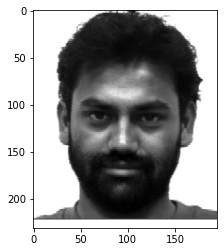

...with...
Omega_I EigenCoefficient:
 [-1.12978901e+08  8.00138951e+06  1.60335884e-08 -4.41416172e+07
 -8.64789759e+05 -1.70653561e+07  2.26560255e+07  5.01155401e+06]
Recognition Distances:
 [3.43019106e+08 2.20944311e+08 2.20289473e+08 3.78539708e+08
 3.86226703e+08 5.29428532e+08 2.91798662e+08 2.19648239e+08]


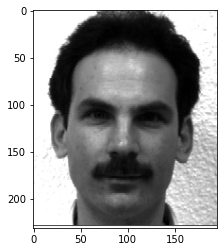



...end


In [61]:
def main():
    # Note: small amount of data
    train_files = [here+train_data+file for file in os.listdir(here+train_data)]
    test_files = [here+test_data+file for file in os.listdir(here+test_data)]
    assert len(train_files) > len(test_files) > 0
    
    # get images from directories
    train_images = []
#     print("TRAINING IMAGES")
    for file in train_files:  # run code on all files in directory
        im = Image.open(file)
        image = np.array(im)
#         plt.imshow(image, cmap='gray')  # visualize
#         plt.show()
        train_images.append(image)
    test_images = []
#     print("\n\nTEST IMAGES:")
    for file in test_files:  # run code on all files in directory
        im = Image.open(file)
        image = np.array(im)
#         plt.imshow(image, cmap='gray')  # visualize
#         plt.show()
        test_images.append(image)
    print("images imported...")
    
    # general variables about data
    m = len(train_images)
    n1 = train_images[0].shape[0]
    n2 = train_images[0].shape[1]
    print("Looking at", m, "images size", (n1,n2))
    
    # train PCA
    omega, u, meu = eigen(train_images)  # must be in order of faces (eigenface, eigencoef)
#     print("Refrence shapes:", omega.shape, u.shape, meu.shape)
    
    # show mean face:
    print("Mean Face:\n", meu)
    plt.imshow(poof(meu, n2), cmap='gray')
    plt.show()
#     add_image = Image.fromarray((poof(meu, n2)).astype(np.uint8))
#     add_image.save(here+"/mean_face.bmp")
    print('\n')
    
    # show eigenfaces
    print("EigenFaces:\n", u)
    for i in range(len(u)):
        temp_im = poof(u[i], n2)
        plt.imshow(temp_im, cmap='gray')  # visualize
        plt.show()
#         add_image = Image.fromarray((temp_im).astype(np.uint8))
#         add_image.save(here+"/eigenface"+str(i)+".bmp")
    print("EigenFace Coefficients:\n", omega)
    
    
    # test PCA
    count = 0
    for test_im in test_images:
        print("\n\n\n\n matching image:")
        plt.imshow(test_im, cmap='gray')  # visualize
        plt.show()
        print("...with...")
        ind = nn1(test_im, omega, u, meu)
        if ind == -1:
            print("Face not in training data!")
        else:
#             print("Face mapped to #"+str(ind))
            plt.imshow(train_images[ind], cmap='gray')  # visualize
            plt.show()
if __name__ == "__main__":
    print("starting...\n\n")
    main()
    print("\n\n...end")